In [ ]:
from google.colab import files
uploaded = files.upload()


Saving store_data.csv to store_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: improve visualization
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv('store_data.csv')
df.head()  # Display first 5 rows


,Customer ID,Customer Name,Last Name,Date of Birth,Sales,Year,Outlet Type,City Type,Category of Goods,Region,...,Ship Date,Ship Mode,State,Postal Code,Product ID,Sub-Category,Product Name,Quantity,Discount,Profit
0,CUST000001,Curtis,Krause,1973-11-29,3344.69,2023,Large,Tier 1,Fast Food,East,...,2020-04-18,Same Day,West Bengal,700001,PROD000001,Burgers,Burgers - 718,3,0.09,448.24
1,CUST000002,Jeremy,Foster,1987-08-30,37094.41,2022,Medium,Tier 2,Fast Food,East,...,2021-01-11,Standard Class,Punjab,160001,PROD000002,Pizzas,Pizzas - 519,5,0.39,3134.34
2,CUST000003,Ariel,Mccann,1980-12-15,35501.08,2023,Large,Village,Electric Appliances,South,...,2020-08-16,Second Class,Gujarat,380001,PROD000003,Fans,Fans - 395,6,0.07,8324.21
3,CUST000004,Colleen,Maynard,1989-05-23,8969.33,2021,Medium,Village,Dairy Products,East,...,2021-10-16,First Class,West Bengal,700001,PROD000004,Milk,Milk - 798,4,0.18,1962.66
4,CUST000005,Gina,Holden,1957-12-31,35530.44,2021,Small,Village,Sessional Fruits & Vegetables,West,...,2019-01-25,Standard Class,Delhi,110001,PROD000005,Tomatoes,Tomatoes - 442,4,0.27,2843.93


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Customer ID        100000 non-null  object 
 1   Customer Name      100000 non-null  object 
 2   Last Name          100000 non-null  object 
 3   Date of Birth      100000 non-null  object 
 4   Sales              100000 non-null  float64
 5   Year               100000 non-null  int64  
 6   Outlet Type        100000 non-null  object 
 7   City Type          100000 non-null  object 
 8   Category of Goods  100000 non-null  object 
 9   Region             100000 non-null  object 
 10  Country            100000 non-null  object 
 11  Segment            100000 non-null  object 
 12  Sales Date         100000 non-null  object 
 13  Order ID           100000 non-null  object 
 14  Order Date         100000 non-null  object 
 15  Ship Date          100000 non-null  object 
 16  Shi

In [ ]:
df.describe()

,Sales,Year,Postal Code,Quantity,Discount,Profit
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25084.410142,2020.999910,388985.180000,5.493760,0.251320,3755.305114
std,14403.187686,1.413757,184192.704685,2.876102,0.144324,2639.852035
min,100.570000,2019.000000,110001.000000,1.000000,0.000000,6.520000
25%,12618.030000,2020.000000,226001.000000,3.000000,0.130000,1651.105000
50%,25134.695000,2021.000000,380001.000000,5.000000,0.250000,3317.450000
75%,37575.850000,2022.000000,560001.000000,8.000000,0.380000,5363.845000
max,49999.890000,2023.000000,700001.000000,10.000000,0.500000,14563.670000


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Customer Name,0
Last Name,0
Date of Birth,0
Sales,0
Year,0
Outlet Type,0
City Type,0
Category of Goods,0
Region,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.columns

Index(['Customer ID', 'Customer Name', 'Last Name', 'Date of Birth', 'Sales',
       'Year', 'Outlet Type', 'City Type', 'Category of Goods', 'Region',
       'Country', 'Segment', 'Sales Date', 'Order ID', 'Order Date',
       'Ship Date', 'Ship Mode', 'State', 'Postal Code', 'Product ID',
       'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# Check & Convert Data Types:

#1. Convert date columns to datetime type
date_cols = ['Sales Date', 'Order Date', 'Ship Date', 'Date of Birth']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

#2. Verify conversion
print(df[date_cols].dtypes)


Sales Date       datetime64[ns]
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Date of Birth    datetime64[ns]
dtype: object


In [ ]:
# Number of unique values in key categorical columns
print("Unique Products:", df['Product Name'].nunique())
print("Unique Categories:", df['Category of Goods'].nunique())
print("Unique Sub-Categories:", df['Sub-Category'].nunique())
print("Unique Regions:", df['Region'].nunique())
print("Unique States:", df['State'].nunique())
print("Unique Outlet Types:", df['Outlet Type'].nunique())


Unique Products: 21365
Unique Categories: 6
Unique Sub-Categories: 24
Unique Regions: 4
Unique States: 10
Unique Outlet Types: 3


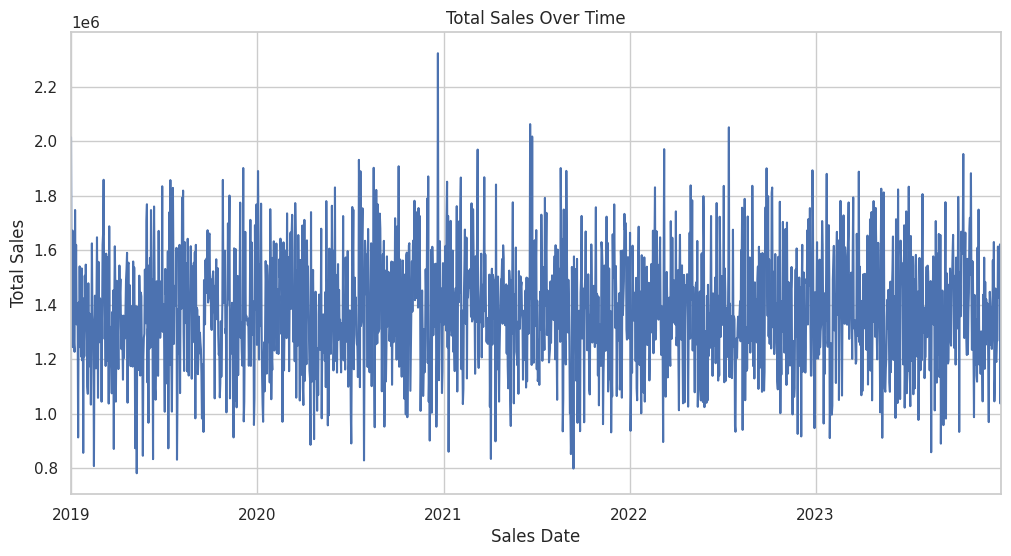

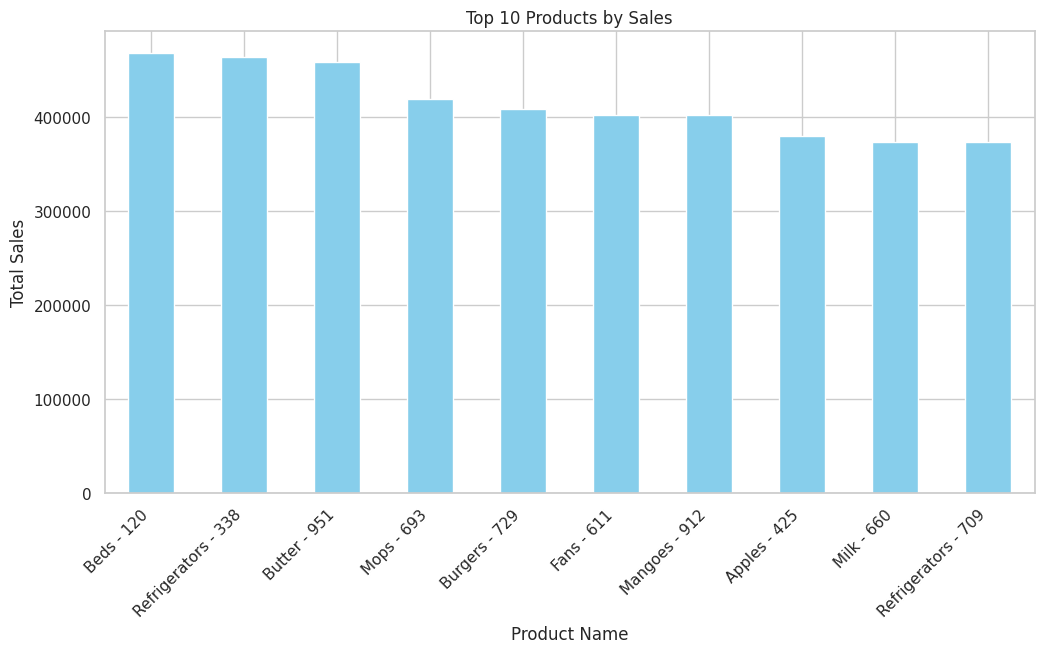

In [ ]:
# Total sales over time
df.groupby('Sales Date')['Sales'].sum().plot(figsize=(12,6))
plt.title("Total Sales Over Time")
plt.xlabel("Sales Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# Top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.show()
